## Heart Failure Clinical Records Datset

Dataset is extracted from Kaggle https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
fileName = 'heart_failure_clinical_records_dataset.csv'

In [9]:
def firstAnalysis(fileName):
    df = pd.read_csv(fileName)
    print('*************************************************************************')
    print('*************************************************************************')
    print(df.dtypes); print(); print('*************************************************************************')
    n,m = df.shape
    print(n,m); print('*************************************************************************')
    print(df.isna().sum()); print(); print('*************************************************************************')
    df.head()
    print('*************************************************************************')
    return(df)

In [10]:
df = firstAnalysis(fileName)

*************************************************************************
*************************************************************************
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

*************************************************************************
299 13
*************************************************************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
seru

We extract the following conclusions from what shown above:
- There is no NaN values
- We have a short dataset of 299 events and 12 variables + 1 outcome => we will have to select most influencial variables to model
- Data types are OK, no change is needed.

In [11]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 2. Data Analysis

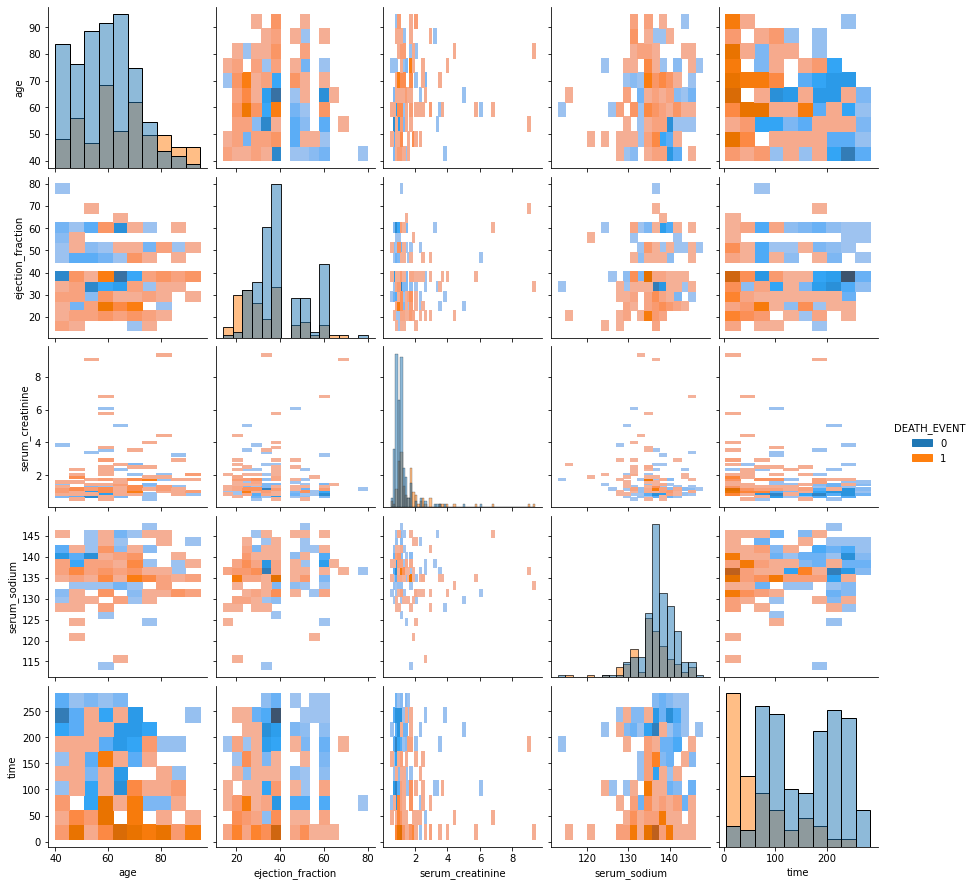

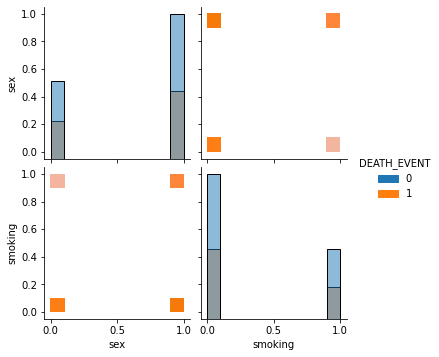

In [27]:
sns.pairplot(data=df, hue='DEATH_EVENT', kind = 'hist', 
             x_vars = ['age','ejection_fraction','serum_creatinine','serum_sodium','time'],
             y_vars = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']);
plt.show()

sns.pairplot(data=df, hue='DEATH_EVENT', kind = 'hist', 
             x_vars = ['sex','smoking'],
             y_vars = ['sex','smoking']);
plt.show()

#ejection_fraction 0 - 40 - 80 
#serum_creatinine 0 - 3 - 10 
#time 0 - 200 - 300



(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

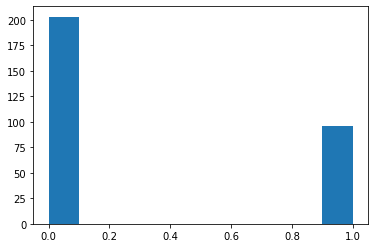

In [16]:
plt.hist(df['DEATH_EVENT'])

(array([37., 37., 39., 55., 46., 40., 19., 12.,  8.,  6.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

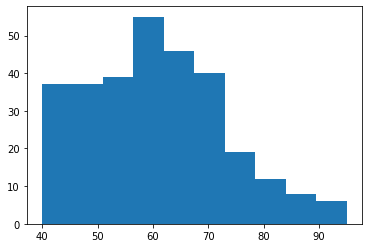

In [17]:
plt.hist(df['age'])

In [18]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [19]:
X = df[['age','ejection_fraction','serum_creatinine','serum_sodium','time','sex','smoking']].values
y = df['DEATH_EVENT']

In [30]:
def logRegr(X,y):

    !pip install scikit-learn
    import sklearn
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    
    # Normalizing X
    X = StandardScaler().fit(X).transform(X);

    # Setting training and test data from the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True);
    X_train = np.around(X_train, decimals = 3);
    X_test = np.around(X_test, decimals = 3);

    # We train the binary logistic regression model and fit
    clf = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train);
    
    # Predicted values from X_test
    y_hat = clf.predict(X_test);

    # Metrics
    acc = accuracy_score(y_test, y_hat)
    prec = average_precision_score(y_test, y_hat, average='macro')
    rec = recall_score(y_test, y_hat, average='macro')
    f1scor = f1_score(y_test,y_hat,average='binary')
    
    # We will now calculate the ROC AUC and plot it
    # Learn to predict each class against the other
    y_score = clf.fit(X_train, y_train).decision_function(X_test);

    # Compute ROC curve, ROC area and plot it
    fpr, tpr, threshold = roc_curve(y_test, y_score);
    roc_auc = auc(fpr, tpr);
    print('ROC AUC: ', roc_auc)

    plt.figure();
    lw = 2;
    plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc);
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('ROC AUC for binary logistic regression ');
    plt.legend(loc="lower right");
    plt.show()
    
    print(confusion_matrix(y_test, y_hat))
    
    return[acc, prec, rec, f1scor, X_train, X_test, y_train, y_test, y_hat];

ROC AUC:  0.9443535188216039


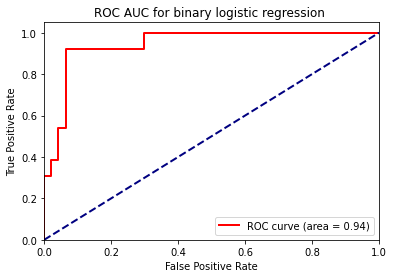

[[41  6]
 [ 1 12]]
0.8833333333333333


In [32]:
values_model = logRegr(X,y)
acc = values_model[0]
print(acc)